<a href="https://colab.research.google.com/github/alyadevii/FinalProject-DigitalSkola/blob/main/Fix_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import library
import pandas as pd
import numpy as np

#import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#import ML Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error # Import mean_squared_error

#import ML Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso

In [ ]:
data = pd.read_csv('adult.csv')
data.head()

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data = pd.read_csv('adult.csv')
data['Final Weight'].unique()

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302])

In [ ]:
data['Hours per Week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

In [ ]:
data['Native Country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
data.dtypes

,0
Age,int64
Workclass,object
Final Weight,int64
Education,object
EducationNum,int64
Marital Status,object
Occupation,object
Relationship,object
Race,object
Gender,object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Final Weight    32561 non-null  int64 
 3   Education       32561 non-null  object
 4   EducationNum    32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Gender          32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  capital loss    32561 non-null  int64 
 12  Hours per Week  32561 non-null  int64 
 13  Native Country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.shape

(32561, 15)

In [ ]:
data.isna().sum()

,0
Age,0
Workclass,0
Final Weight,0
Education,0
EducationNum,0
Marital Status,0
Occupation,0
Relationship,0
Race,0
Gender,0


In [ ]:
data[data.duplicated].shape

(24, 15)

In [ ]:
data.describe()

,Age,Final Weight,EducationNum,Capital Gain,capital loss,Hours per Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
data ['Workclass']= data['Workclass'].replace (' ?','Unknown')

In [ ]:
data['Workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'Unknown', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
data ['Occupation']= data['Occupation'].replace (' ?','Unknown')

In [ ]:
data['Occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', 'Unknown', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

## Label Encoding untuk binary feature

In [ ]:
data_Le = data.copy() #Label Encodig

In [ ]:
encoders = {}  # buat nyimpen objek encoder untuk kolom-kolom yg di-encode

# Label Encoding will be used for columns with 2 or more unique values
le_count = LabelEncoder()
for col in data_Le.columns[1:]:
    if data_Le[col].dtype == 'object':
       data_Le[col] = le_count.fit_transform(data_Le[col])



print('{} columns were label encoded.'.format(le_count))

LabelEncoder() columns were label encoded.


In [ ]:
data_Le

,Age,Workclass,Final Weight,Education,EducationNum,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,capital loss,Hours per Week,Native Country,Income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,39,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,39,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,39,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,39,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,39,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,39,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,39,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,39,0


# **EDA**

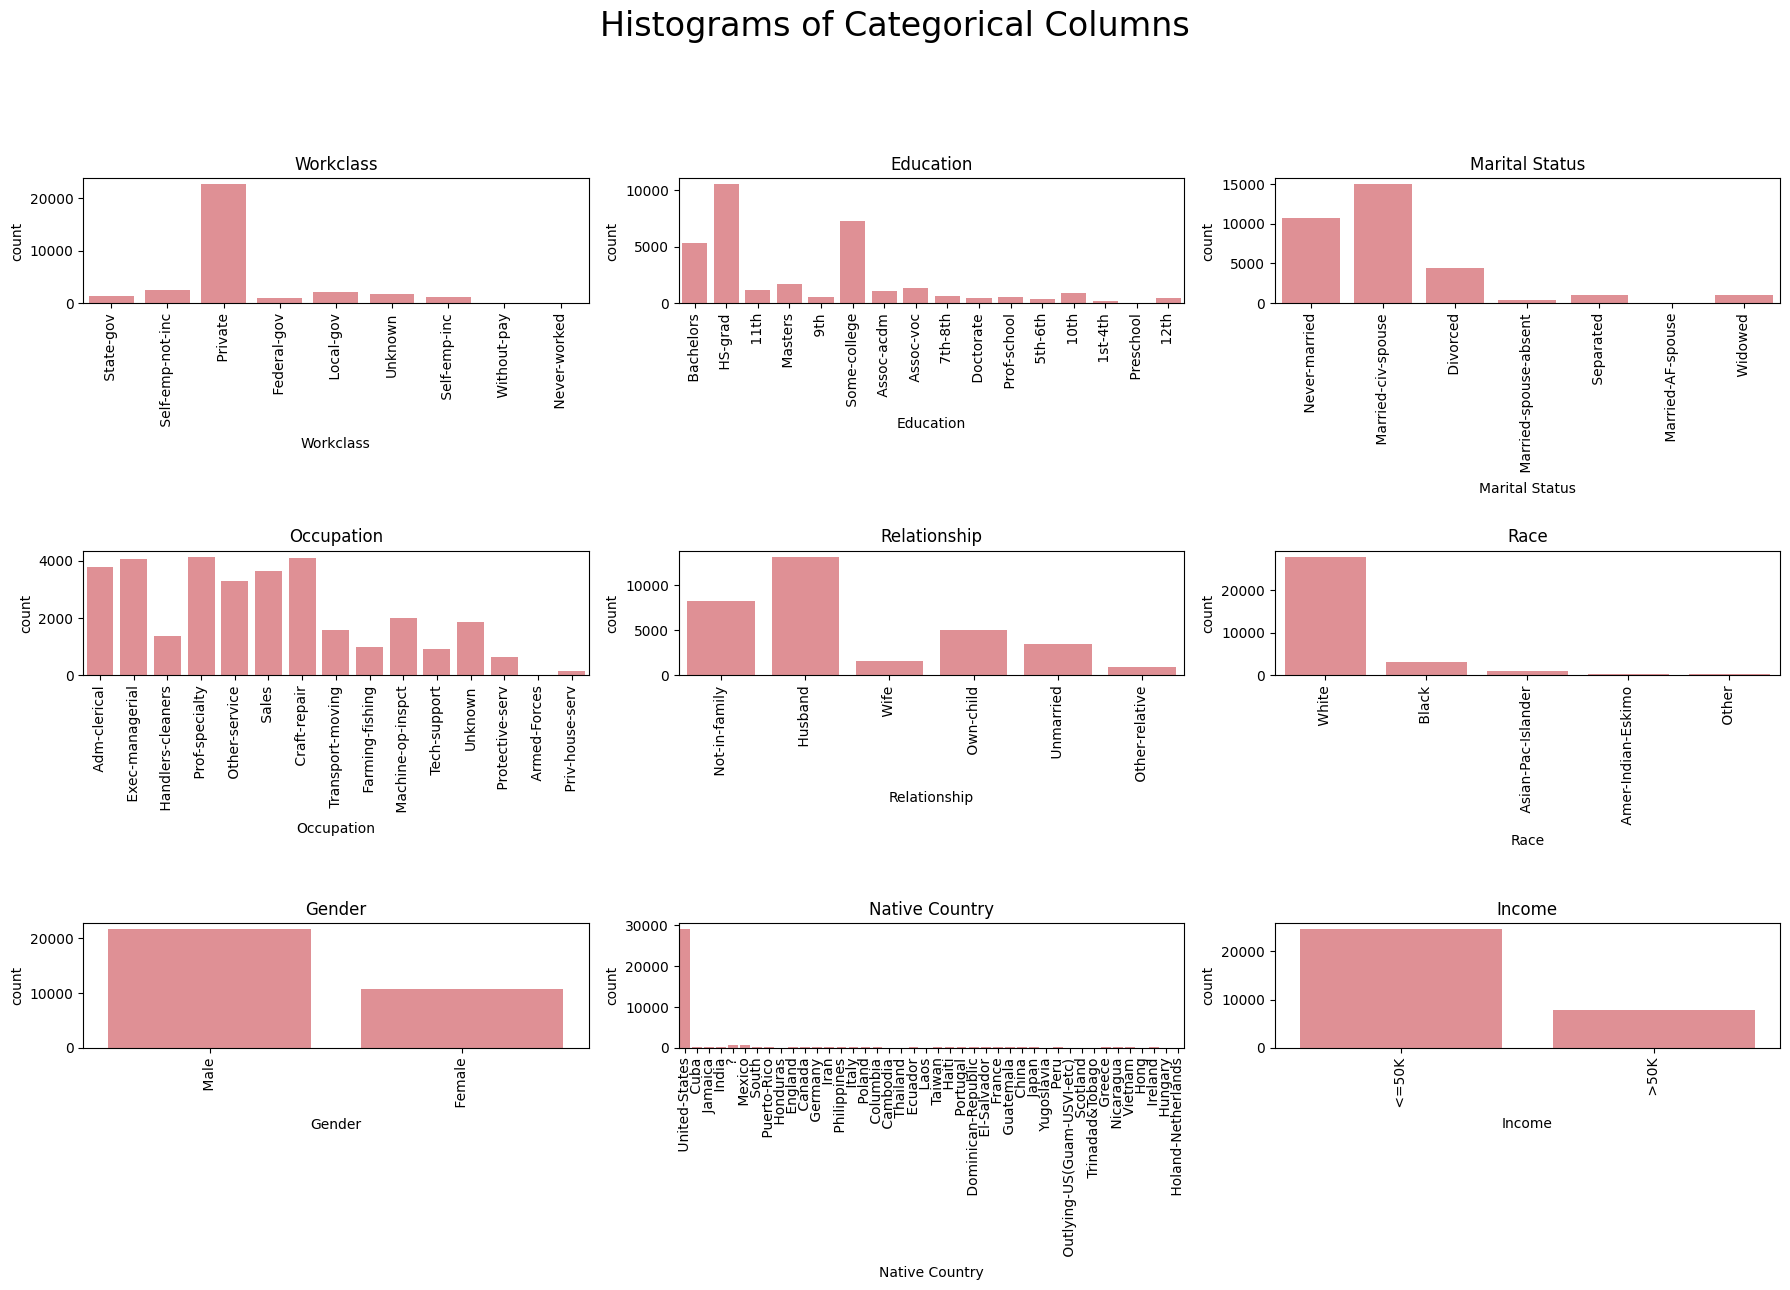

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data2 = data[['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender',
              'Native Country', 'Income']]

fig = plt.figure(figsize=(18, 15))
plt.suptitle('Histograms of Categorical Columns\n', horizontalalignment="center",
             fontstyle="normal", fontsize=24, fontfamily="sans-serif")

for i in range(data2.shape[1]):
    plt.subplot(4, 3, i + 1)
    ax = sns.countplot(data=data2, x=data2.columns[i], color='#ec838a')
    ax.set_title(data2.columns[i])
    ax.tick_params(axis='x', rotation=90)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


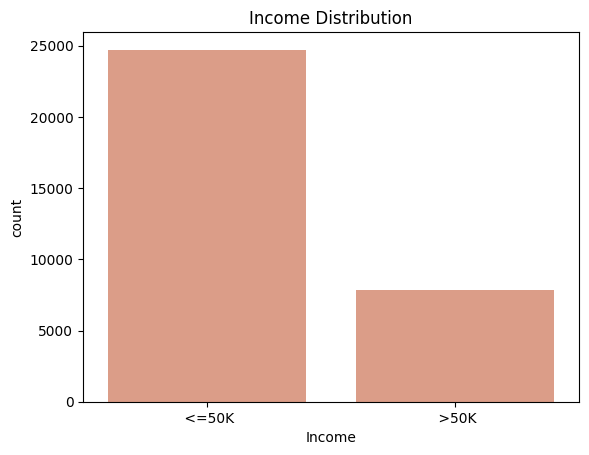

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x="Income", color = 'darksalmon')
plt.title('Income Distribution')
plt.show()


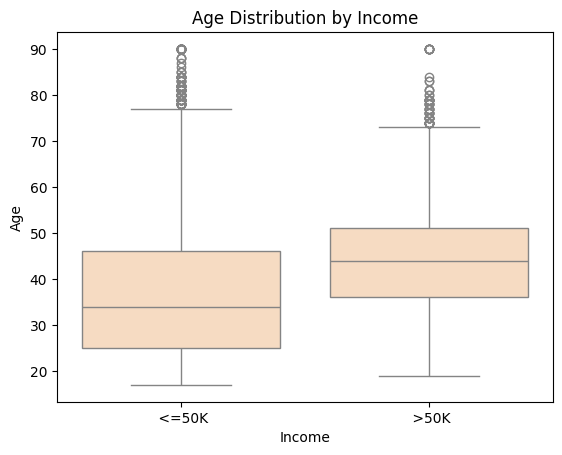

In [ ]:
sns.boxplot (data=data, x="Income", y= "Age",color= 'peachpuff')
plt.title('Age Distribution by Income')
plt.show()

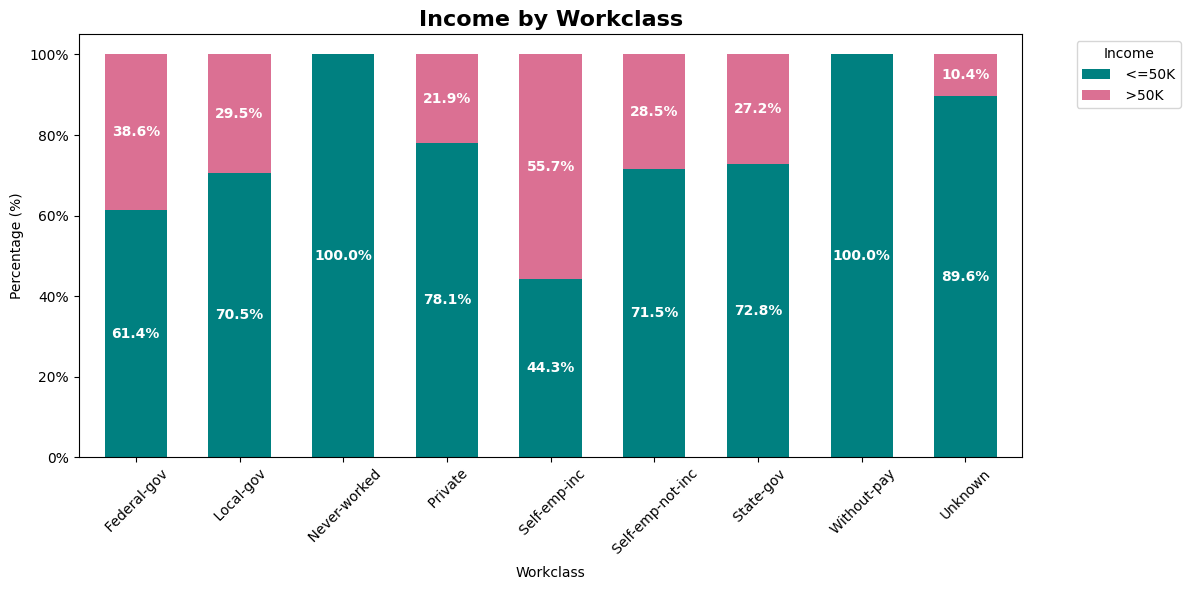

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Buat data Income vs Workclass
contract_split = data[['Income','Workclass']].groupby(['Workclass','Income']).size().unstack()

# Hitung persentase
contract_split = contract_split.div(contract_split.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
colors = ["teal", "palevioletred"]
ax = contract_split.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    color=colors,
    width=0.6,
    rot=45
)

# Format axis
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Income by Workclass", fontsize=16, fontweight="bold")
plt.xlabel("Workclass")
plt.ylabel("Percentage (%)")

# Legend
plt.legend(title="Income", bbox_to_anchor=(1.05,1), loc='upper left')

# Tambahkan label persentase
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # supaya tidak label di 0
        ax.annotate(f'{height:.1f}%',
                    (x + width/2, y + height/2),
                    ha='center', va='center',
                    color='white', weight='bold', size=10)

plt.tight_layout()
plt.show()

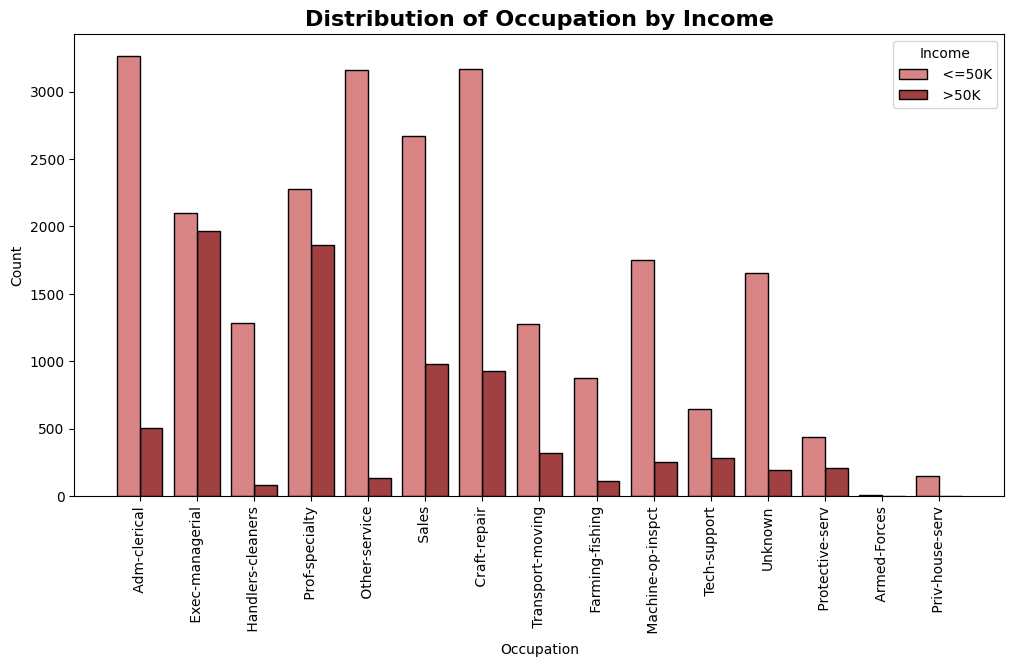

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Plot distribusi jumlah occupation per Income
sns.histplot(
    data=data,
    x="Occupation",
    hue="Income",
    multiple="dodge",
    shrink=0.8,
    palette=['indianred','maroon']
)

plt.xticks(rotation=90)
plt.title("Distribution of Occupation by Income", fontsize=16, fontweight="bold")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()


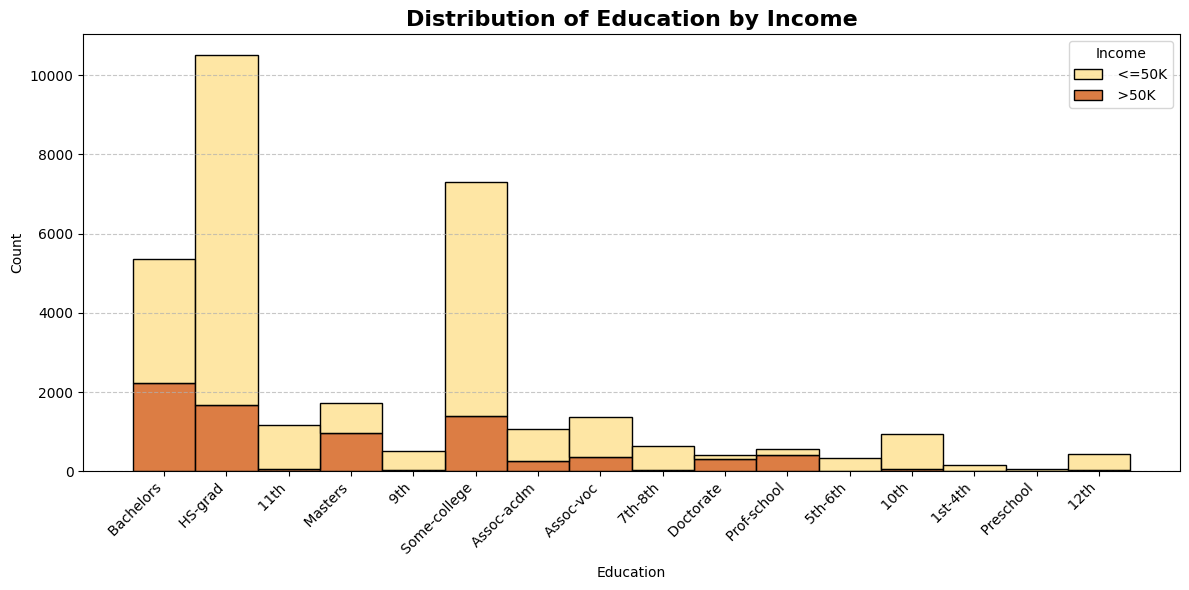

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Ambil 10 warna dari palet YlOrBr
yl_or_br = sns.color_palette("YlOrBr", 10)

# Pilih 2 warna dari palet tersebut, misal indeks 2 dan 7 untuk kontras warna
palette = [yl_or_br[2], yl_or_br[7]]

sns.histplot(
    data=data,
    x="Education",
    hue="Income",
    multiple="stack",
    kde=False,
    palette=palette
)

plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Education by Income", fontsize=16, fontweight="bold")
plt.xlabel("Education")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


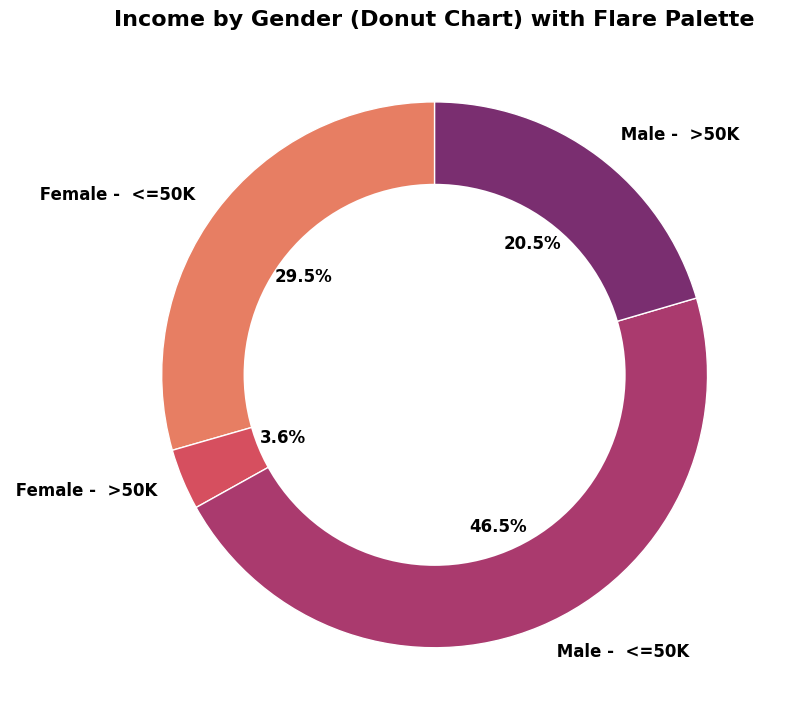

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


contract_split = data[['Income','Gender']].groupby(['Gender','Income']).size().reset_index(name='Count')

labels = contract_split['Gender'] + " - " + contract_split['Income']
sizes = contract_split['Count']


n = len(labels)
flare_cmap = sns.color_palette("flare", n_colors=n)

fig, ax = plt.subplots(figsize=(8,8))

wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=flare_cmap,
    textprops={'fontsize': 12, 'weight': 'bold'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)


centre_circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(centre_circle)

plt.title("Income by Gender (Donut Chart) with Flare Palette", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


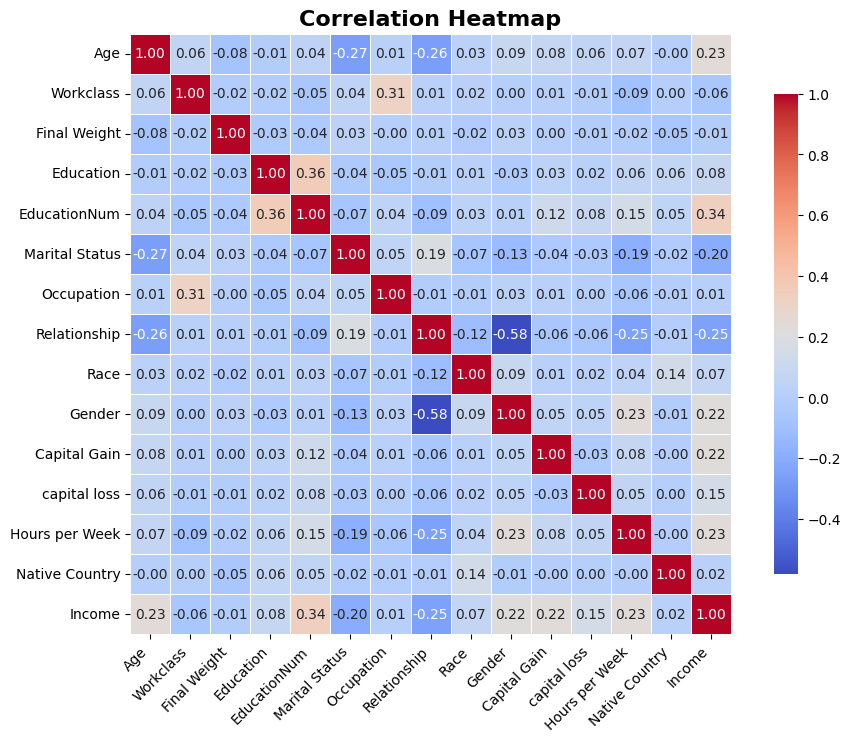

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data_Le.select_dtypes(include='number').corr()
# Buat color palette flare dengan jumlah warna sesuai jumlah kolom
n = len(corr.columns)
flare_cmap = sns.color_palette("flare", n_colors=n)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
)

plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

# **Split Dataset**

In [ ]:
# Fitur & target
X = data.drop(columns=["Income"])
y = data["Income"].str.strip() # label: <=50K / >50K

In [ ]:
# Deteksi kolom numerik & kategorikal lagi (aman)
num_cols = X.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

In [ ]:
# Pipeline numerik & kategorikal
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

In [ ]:
# Drop rows with missing values
data.dropna(inplace=True)

# Fitur & target (re-define after dropping NaNs)
X = data.drop(columns=["Income"])
y = data["Income"].str.strip() # label: <=50K / >50K

# Stratified split karena target imbalanced
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((26048, 14), (6513, 14))

# **MODEL**


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

In [ ]:
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_proba_log = log_reg.predict_proba(X_test)[:, 1]  # prob kelas ">50K"

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_log))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_log))
# Hitung ROC-AUC
y_test_bin = (y_test == ">50K").astype(int)
print("ROC-AUC:", roc_auc_score(y_test_bin, y_proba_log))

=== Logistic Regression ===
              precision    recall  f1-score   support

       <=50K       0.94      0.80      0.87      4945
        >50K       0.57      0.85      0.69      1568

    accuracy                           0.81      6513
   macro avg       0.76      0.83      0.78      6513
weighted avg       0.86      0.81      0.82      6513

Confusion matrix:
 [[3954  991]
 [ 231 1337]]
ROC-AUC: 0.9094226542993336


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import joblib
import os

rf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        n_jobs=-1,
        class_weight="balanced_subsample"
    ))
])

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test_bin, y_proba_rf))

best_model = rf
joblib.dump(rf, "income_model.pkl", compress=9)
os.path.getsize("income_model.pkl")

=== Random Forest ===
              precision    recall  f1-score   support

       <=50K       0.95      0.76      0.85      4945
        >50K       0.54      0.89      0.67      1568

    accuracy                           0.79      6513
   macro avg       0.75      0.82      0.76      6513
weighted avg       0.85      0.79      0.80      6513

Confusion matrix:
 [[3758 1187]
 [ 179 1389]]
ROC-AUC: 0.9104196544644146


1491305

#KNN

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [ ]:
# Pisahkan kolom numerik dan kategorikal
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

# Pipeline numerik
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pipeline kategorikal
categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Gabungkan ke dalam preprocessor
preprocessor = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])


In [ ]:
knn_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier(n_neighbors=5))  # Kamu bisa ubah k-nya
])


In [ ]:
knn_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Final Weight',
                                                   'EducationNum',
                                                   'Capital Gain',
                                                   'capital loss',
                                                   'Hours per Week']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Workclass', 'Education',
                                                   'Marital Status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Gender',
                                                   'Native Country'])])),
                ('classifier', KNeighborsClassifier())])

In [ ]:
y_pred_knn = knn_pipeline.predict(X_test)
y_proba_knn = knn_pipeline.predict_proba(X_test)[:, 1]

# Classification report & confusion matrix
print("=== K-Nearest Neighbors (KNN) ===")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# ROC AUC (pastikan y_test punya lebih dari 1 kelas!)
print("ROC-AUC:", roc_auc_score(y_test, y_proba_knn))


=== K-Nearest Neighbors (KNN) ===
              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      4945
        >50K       0.67      0.62      0.65      1568

    accuracy                           0.84      6513
   macro avg       0.78      0.76      0.77      6513
weighted avg       0.83      0.84      0.83      6513

Confusion Matrix:
 [[4476  469]
 [ 596  972]]
ROC-AUC: 0.8679554822434534


#Decision Tree

In [ ]:
# Import library
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [ ]:
# Pipeline model Decision Tree
tree_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # Sama seperti sebelumnya (numerik + kategorikal)
    ("classifier", DecisionTreeClassifier(random_state=42))
])


In [ ]:
tree_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Final Weight',
                                                   'EducationNum',
                                                   'Capital Gain',
                                                   'capital loss',
                                                   'Hours per Week']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Workclass', 'Education',
                                                   'Marital Status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Gender',
                                                   'Native Country'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [ ]:
# Prediksi label dan probabilitas
y_pred_tree = tree_pipeline.predict(X_test)
y_proba_tree = tree_pipeline.predict_proba(X_test)[:, 1]  # Probabilitas kelas 1 (>50K)

# Evaluasi
print("=== Decision Tree Classifier ===")
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_tree))


=== Decision Tree Classifier ===
              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      4945
        >50K       0.61      0.64      0.62      1568

    accuracy                           0.81      6513
   macro avg       0.75      0.75      0.75      6513
weighted avg       0.82      0.81      0.82      6513

Confusion Matrix:
 [[4299  646]
 [ 568 1000]]
ROC-AUC: 0.75355904748148


 **GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100],
        'max_depth': [None, 10]
    },
    "Logistic Regression": {
        'C': [0.1, 1],
        'penalty': ['l2'],
        'solver': ['liblinear']
    },
    "Decision Tree": {
        'max_depth': [3, 5, None]
    }
}

# Apply preprocessor to X_train and X_test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


for name in models:
    print(f"\nRunning GridSearchCV for {name}")
    grid = GridSearchCV(models[name], param_grids[name], cv=5, scoring='f1_macro', n_jobs=-1)
    grid.fit(X_train_processed, y_train)
    print("Best params:", grid.best_params_)
    print("Best score:", grid.best_score_)


Running GridSearchCV for Random Forest
Best params: {'max_depth': None, 'n_estimators': 50}
Best score: 0.7846998657803779

Running GridSearchCV for Logistic Regression
Best params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.7814611019332294

Running GridSearchCV for Decision Tree
Best params: {'max_depth': 5}
Best score: 0.7601716227976789


In [ ]:
joblib.dump(rf, 'income_model.pkl')

['income_model.pkl']

# **Deployment Streamlit**